In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report




In [106]:
fetal_data = pd.read_csv('Fetal Health Classification/fetal_health.csv')
fetal_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [107]:
fetal_data.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [108]:
fetal_data.shape

(2126, 22)

### **Exploratory Data Analysis (EDA)**

In [109]:
print (f"Dataset Columns:\n{fetal_data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [110]:
fetal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [111]:
print (f"The dataset size is :{fetal_data.shape}")

The dataset size is :(2126, 22)


In [112]:
fetal_data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [113]:
fetal_data.isnull().sum().sum()

np.int64(0)

# There are no missing values.


In [114]:
fetal_data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [115]:
fetal_data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: ylabel='count'>

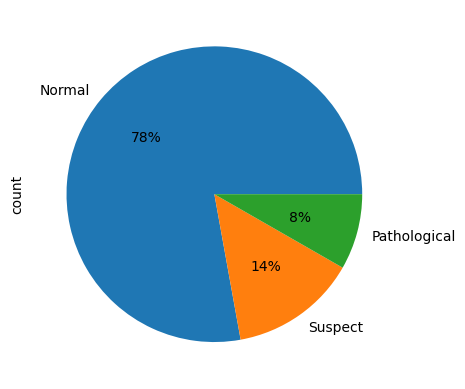

In [116]:
fetal_data['fetal_health'].value_counts().plot(kind="pie",autopct='%1.0f%%' ,labels=['Normal','Suspect','Pathological'])

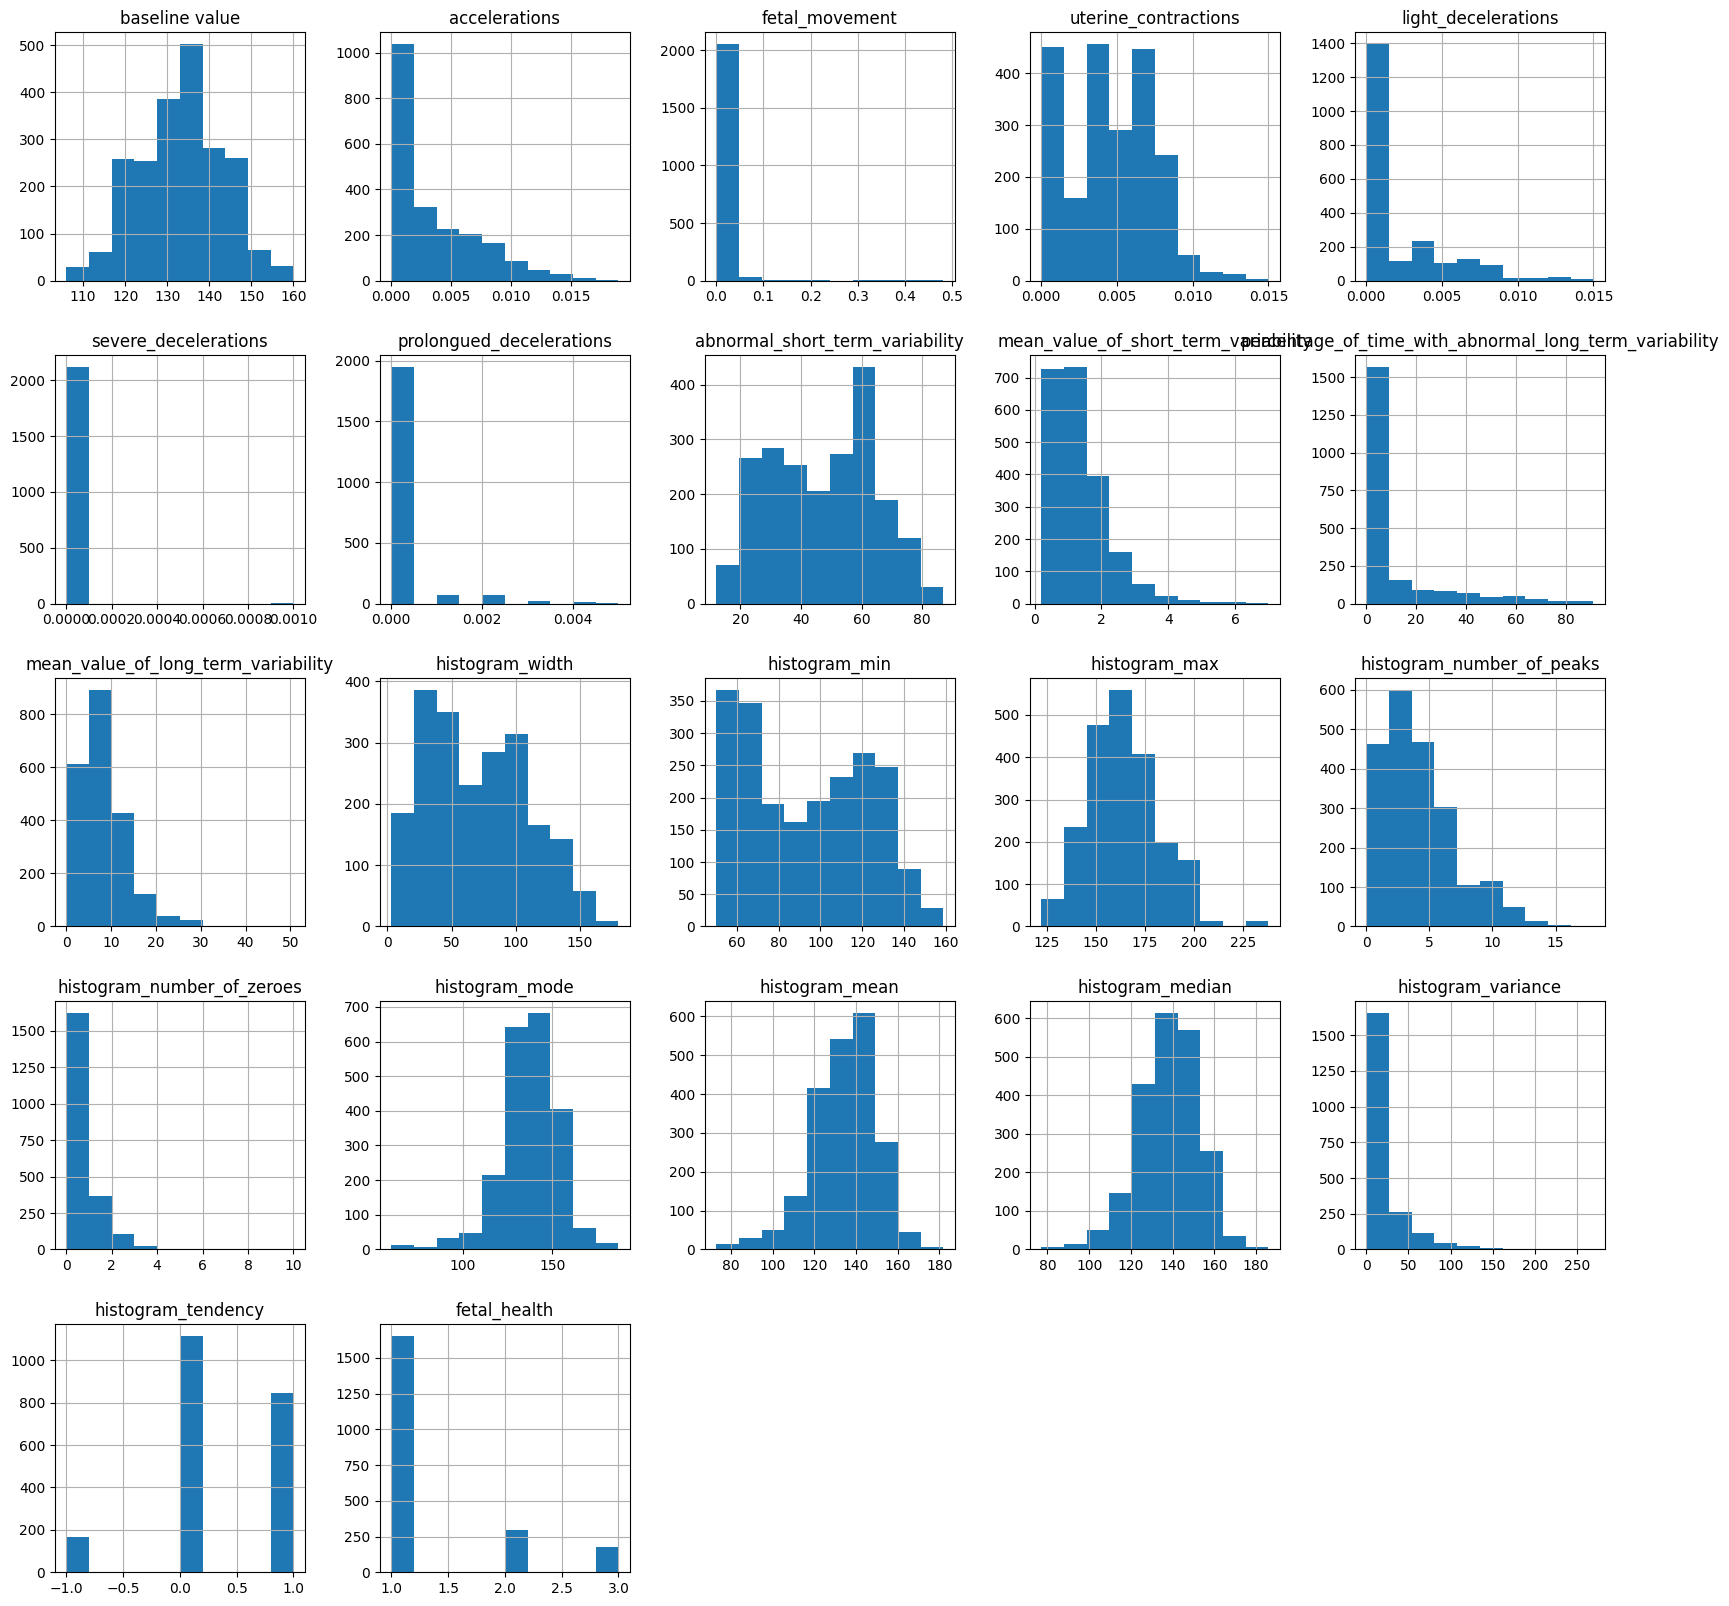

In [117]:
data_hist_plot=fetal_data.hist(figsize=(20,20))

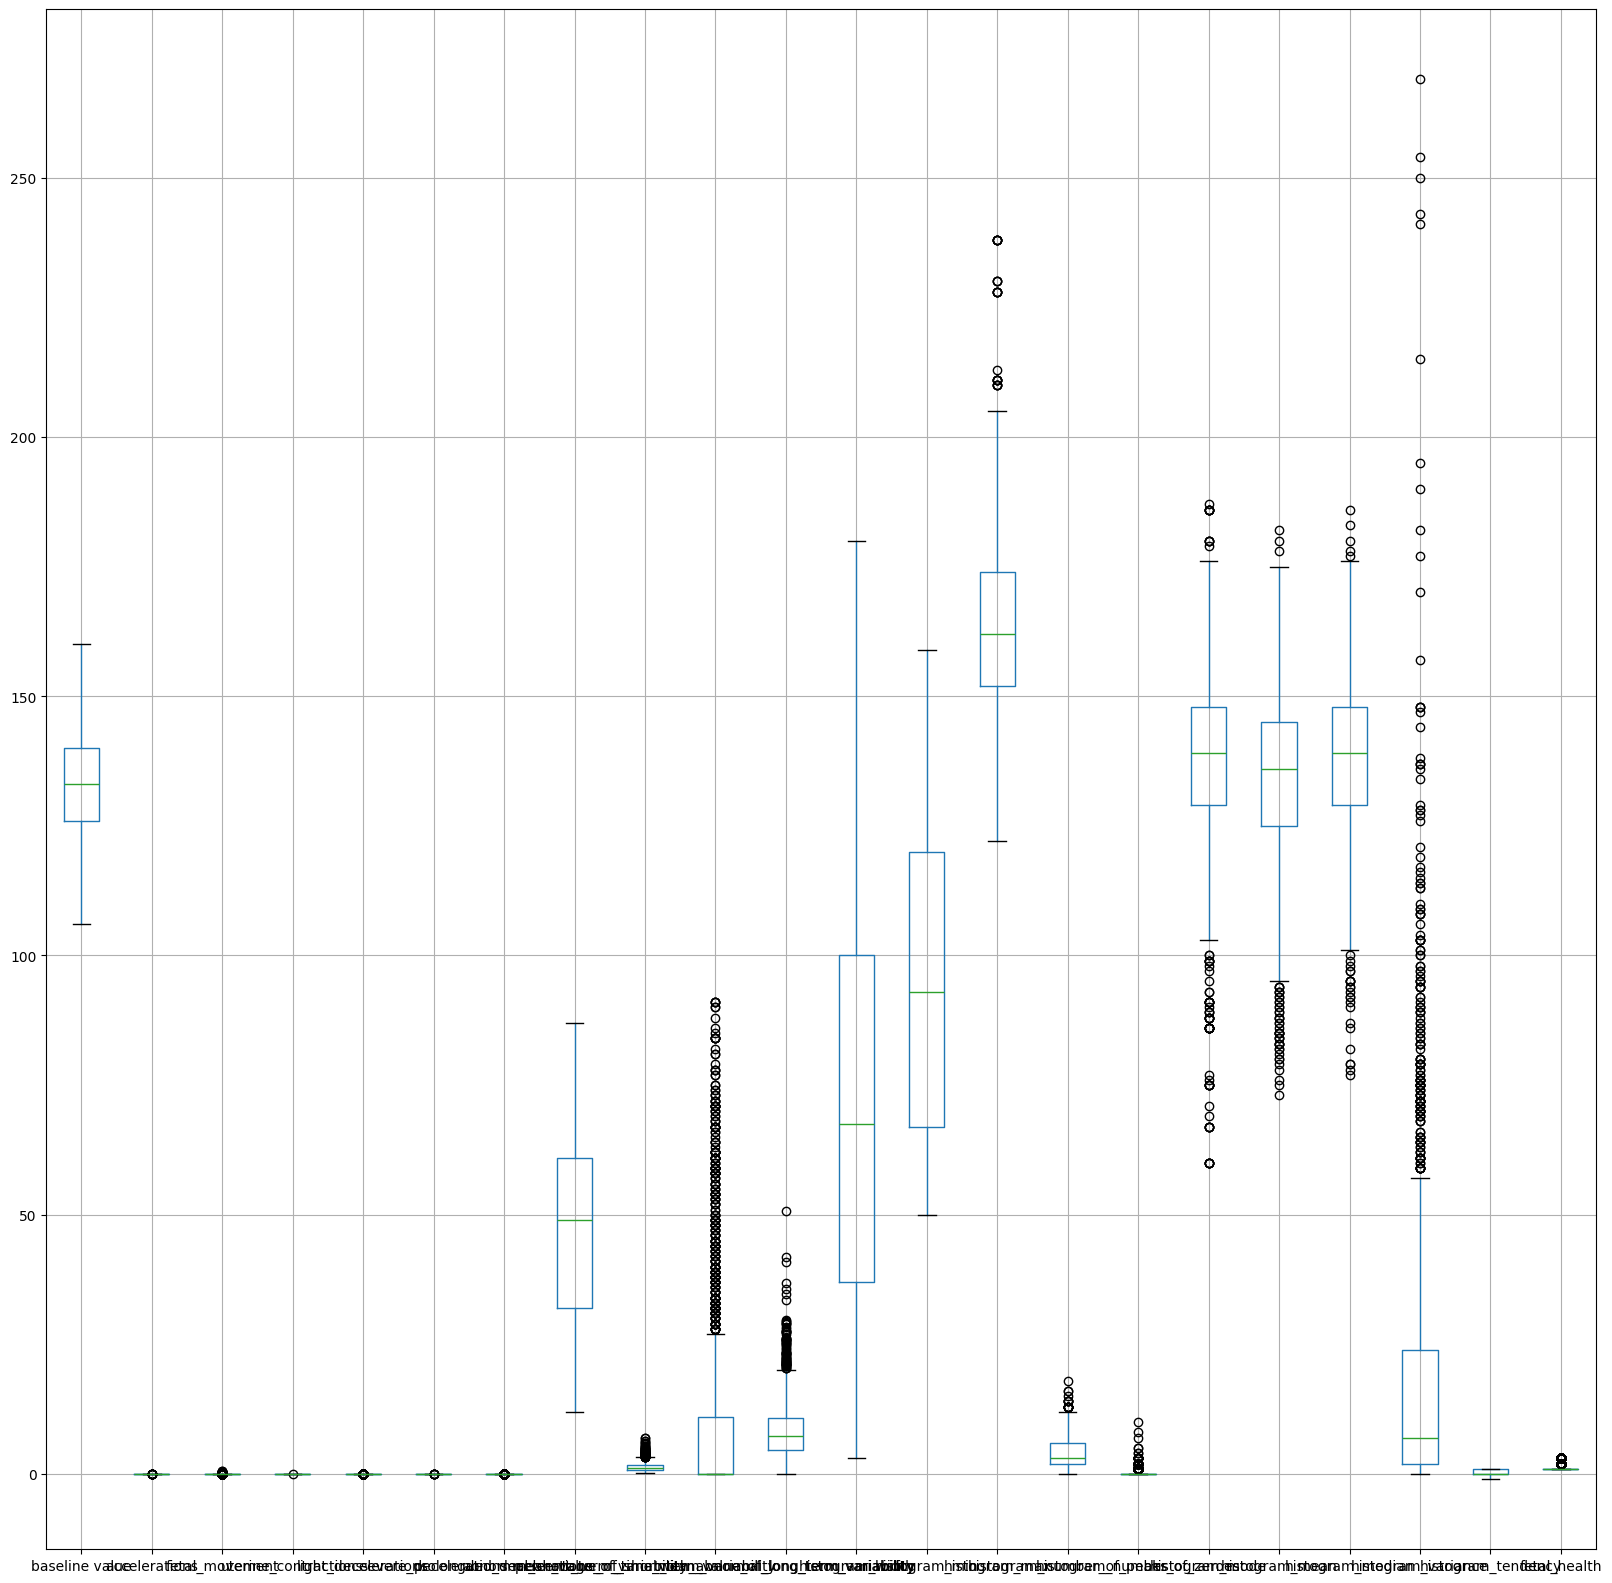

In [118]:
data_hist_plot=fetal_data.boxplot(figsize=(20,20))

# CORRELATION & CORRELATION MATRIX

In [119]:
numeric_data=fetal_data.select_dtypes(exclude=object)
corr_matrix=numeric_data.corr()
corr_matrix

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


(array([0.5]), [Text(0, 0.5, 'fetal_health')])

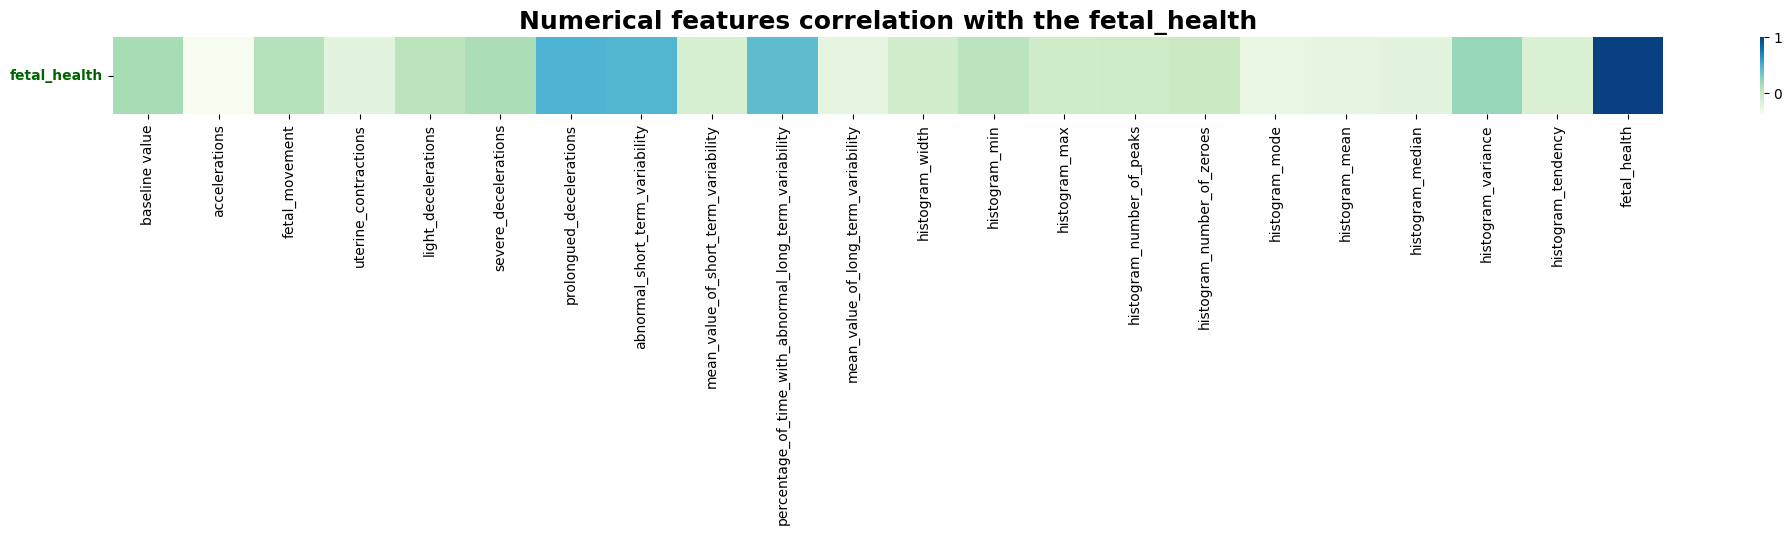

In [120]:
numeric_data=fetal_data.select_dtypes(exclude=object)
numeric_corr=numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=['fetal_health'],ascending=False).head(1),cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health",weight="bold",fontsize=18)
plt.yticks(weight="bold",color="darkgreen",rotation=0)

In [121]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()
Num_feature

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


#### This shows that prolongued_decelerations, abnormal_short_term_variability and percentage_of_time_with_abnormal_long_term_variability are correlated to the target column that is fetal_health

# Heatmap


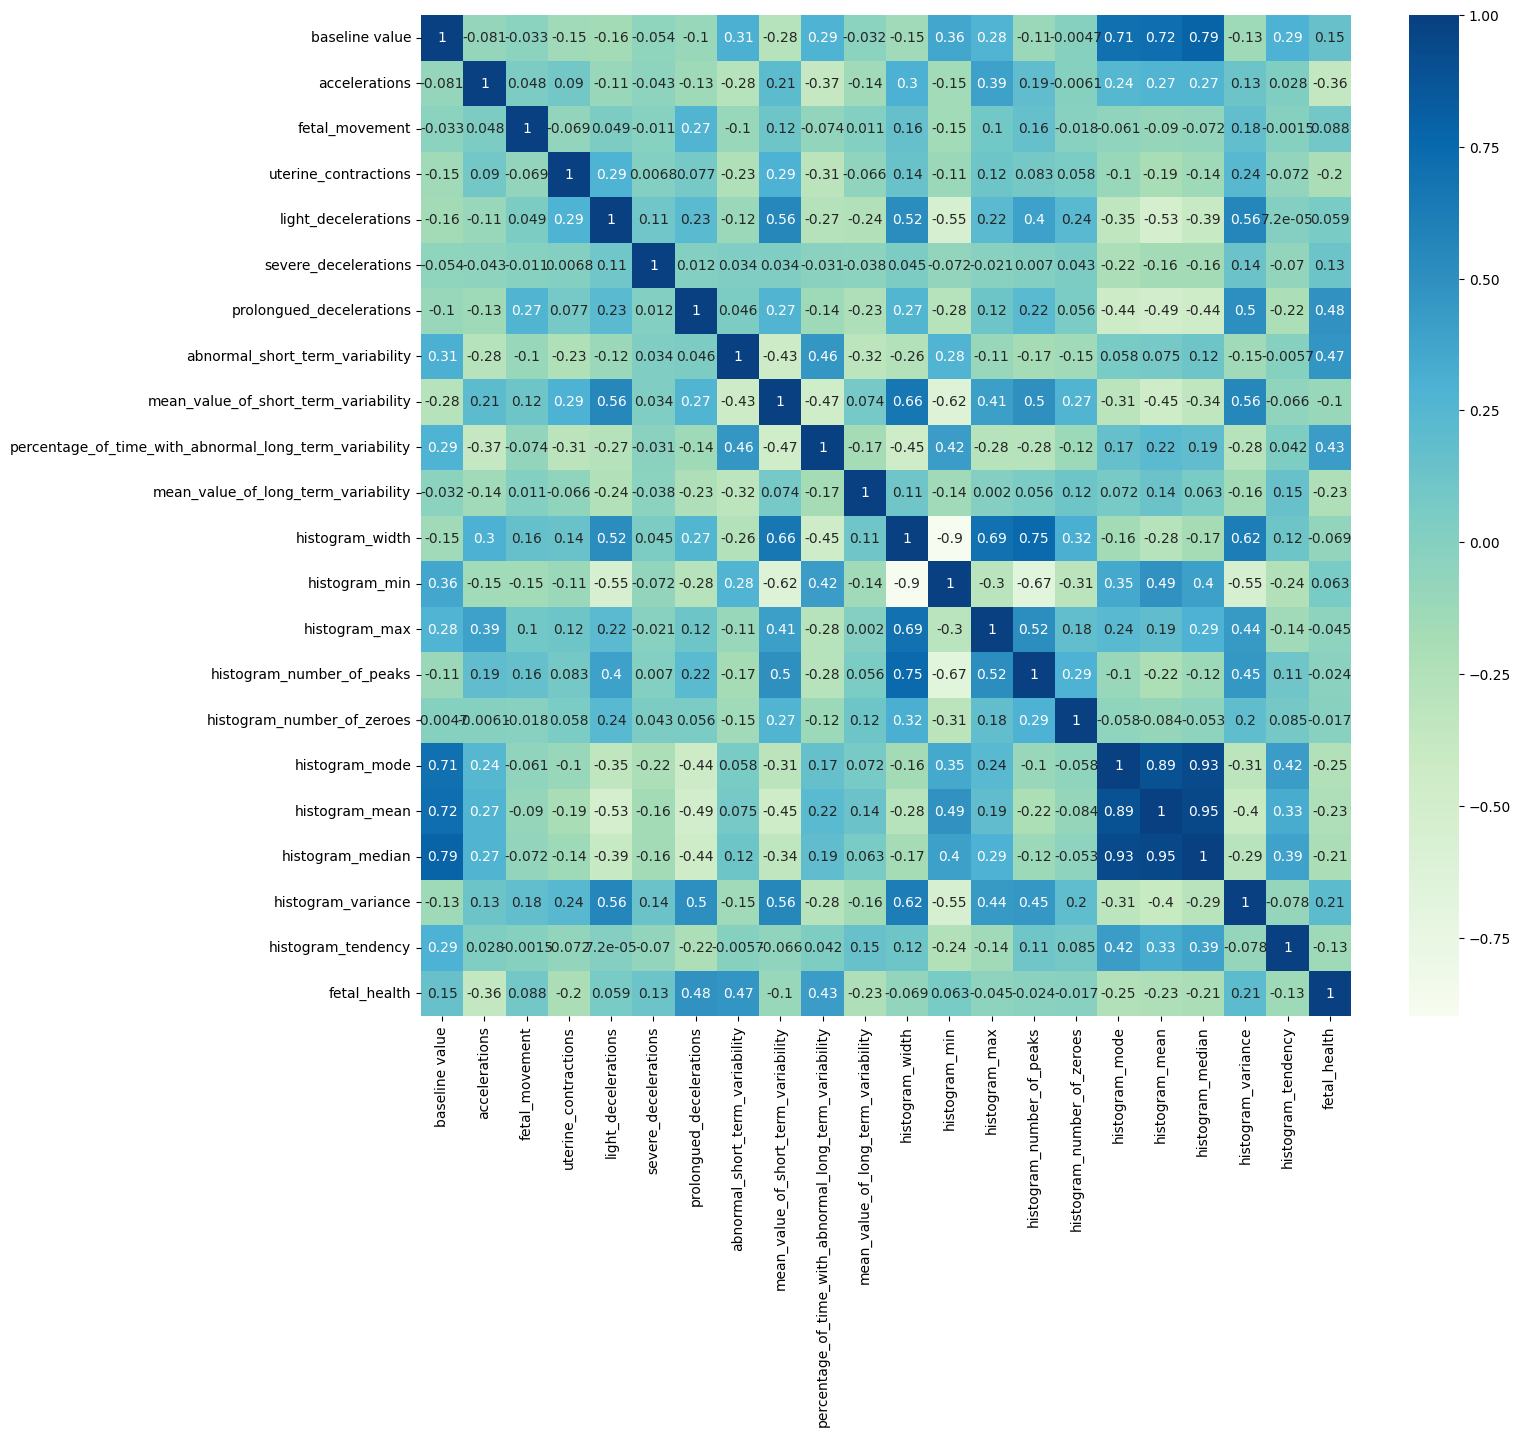

In [122]:
plt.figure(figsize=(15,13))
p=sns.heatmap(corr_matrix,annot=True,cmap="GnBu")

# Scaling


In [123]:
columns=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X=StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(fetal_data.drop(["fetal_health"],axis = 1),), columns = columns)

In [124]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [125]:
y = fetal_data["fetal_health"]

In [126]:
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

# Train Test Split and Cross Validation Methods

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1488, 21), (638, 21), (1488,), (638,))

# Logistic Regression (LR)

In [129]:
log_reg_model = LogisticRegression()

In [130]:
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [131]:
y_pred_lr = log_reg_model.predict(X_test)

In [159]:
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print(f"Accuracy of Logistic Regression = {round(lr_accuracy,5)*100}%")

Accuracy of Logistic Regression = 87.931%


In [133]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.67      0.62      0.65       101
         3.0       0.65      0.80      0.72        41

    accuracy                           0.88       638
   macro avg       0.75      0.79      0.77       638
weighted avg       0.88      0.88      0.88       638



## SUPPORT VECTOR MACHINE (SVM)

In [134]:
from sklearn.svm import SVC


In [165]:
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [166]:
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

In [160]:
print(f"Accuracy of SVM = {round(svm_accuracy,5)*100}%")

Accuracy of SVM = 91.693%


In [137]:
print("SVM Classification Report")
print(classification_report(y_test, svm_y_pred))

SVM Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       496
         2.0       0.79      0.73      0.76       101
         3.0       0.84      0.78      0.81        41

    accuracy                           0.92       638
   macro avg       0.86      0.83      0.84       638
weighted avg       0.91      0.92      0.92       638



## RANDOM FOREST CLASSIFICATION


In [138]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [139]:
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

In [161]:
print(f"Accuracy of Random Forest Classification = {round(rf_accuracy,5)*100}%")

Accuracy of Random Forest Classification = 94.357%


In [141]:
print("Random Forest Classification Report")
print(classification_report(y_test, rf_y_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.91      0.76      0.83       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



## K-Nearest Neighbors (KNN)

In [142]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [143]:
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)


In [162]:
print(f"Accuracy of KNN = {round(knn_accuracy,5)*100}%")

Accuracy of KNN = 90.90899999999999%


In [145]:
print("KNN Classification Report")
print(classification_report(y_test, knn_y_pred))

KNN Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       496
         2.0       0.79      0.70      0.74       101
         3.0       0.79      0.76      0.78        41

    accuracy                           0.91       638
   macro avg       0.84      0.81      0.82       638
weighted avg       0.91      0.91      0.91       638



# Model Comparision

In [153]:
knn_accuracy


0.9090909090909091

In [154]:
rf_accuracy

0.9435736677115988

In [155]:
svm_accuracy

0.9169278996865203

In [163]:
lr_accuracy

0.8793103448275862

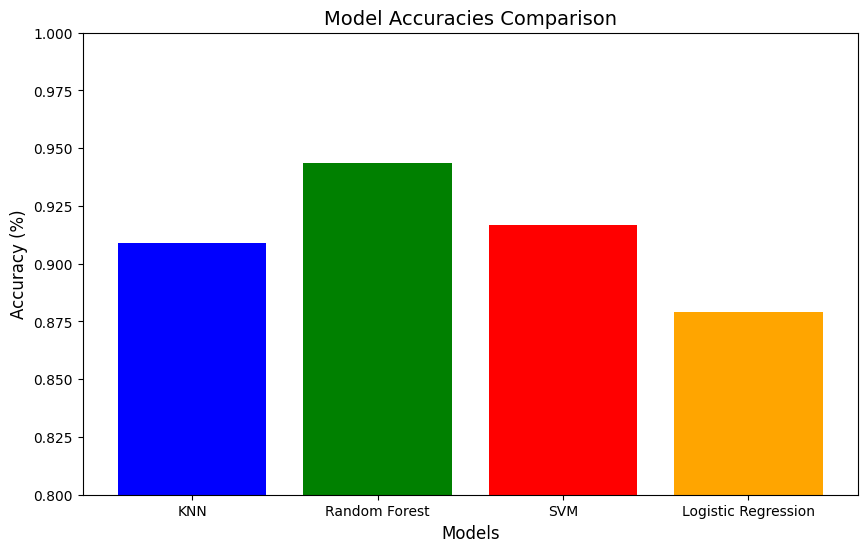

In [164]:
models = ['KNN', 'Random Forest', 'SVM', 'Logistic Regression']
accuracies = [knn_accuracy, rf_accuracy, svm_accuracy, lr_accuracy]


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])

plt.title('Model Accuracies Comparison', fontsize=14)
plt.ylim(0.8,1.0)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

plt.show()


### This bar graph shows that the Random Forest Classification model is comparatively more accurate than other models.